<a href="https://colab.research.google.com/github/Reefavibes/AI-Research/blob/main/Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [31]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [32]:
def plot(x):
    # Create a figure and a set of subplots.
    fig, ax = plt.subplots()

    # Display data as an image, i.e., on a 2D regular raster, with a grayscale colormap.
    im = ax.imshow(x, cmap='gray')

    # Turn off the axes.
    ax.axis('off')

    # Set the size of the figure in inches.
    fig.set_size_inches(20, 20)

    # Display the figure.
    plt.show()


The provided code snippet defines a function named plot that takes a single argument x, which is expected to be a two-dimensional array-like structure, suitable for visualization as an image. Inside the function, a figure and a set of subplots are created using Matplotlib's plt.subplots() method. The variable ax represents the axes of the subplot, and the variable fig represents the entire figure. The image data contained in x is then displayed as a grayscale image on these axes with the imshow function, specifying the colormap as 'gray'. The axes are subsequently turned off using ax.axis('off'), which means no axis lines, labels, or ticks will be shown. The size of the figure is set to be 20 by 20 inches with fig.set_size_inches(20, 20), providing a large, clear image. Finally, plt.show() is called to display the figure on the screen. This function is likely used for the visualization of matrix data, such as an image in a computer vision application or a heatmap in data analysis.

In [33]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-33-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


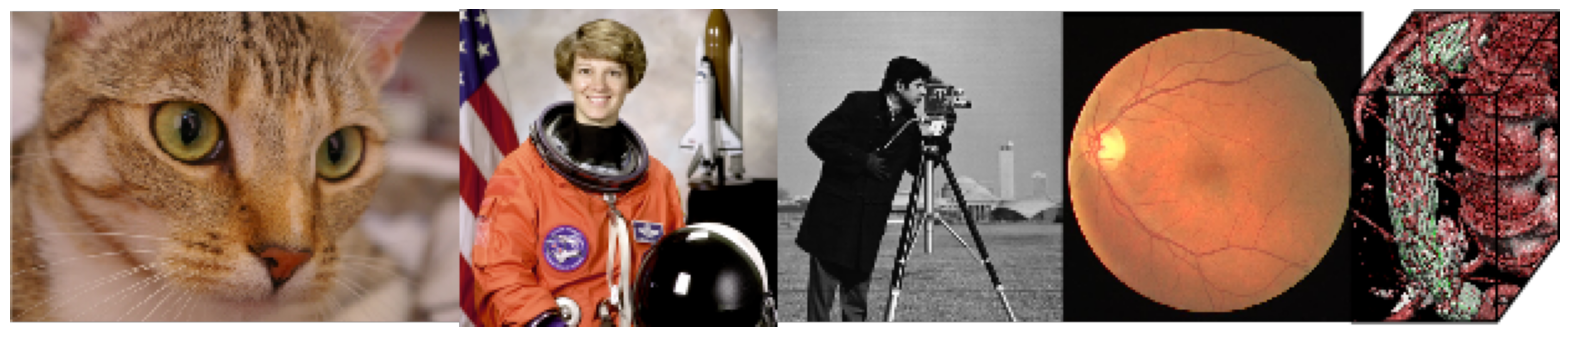

In [34]:
plot(im)

In [35]:
net = alexnet(pretrained=True).cuda(0)

In [36]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [37]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-37-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


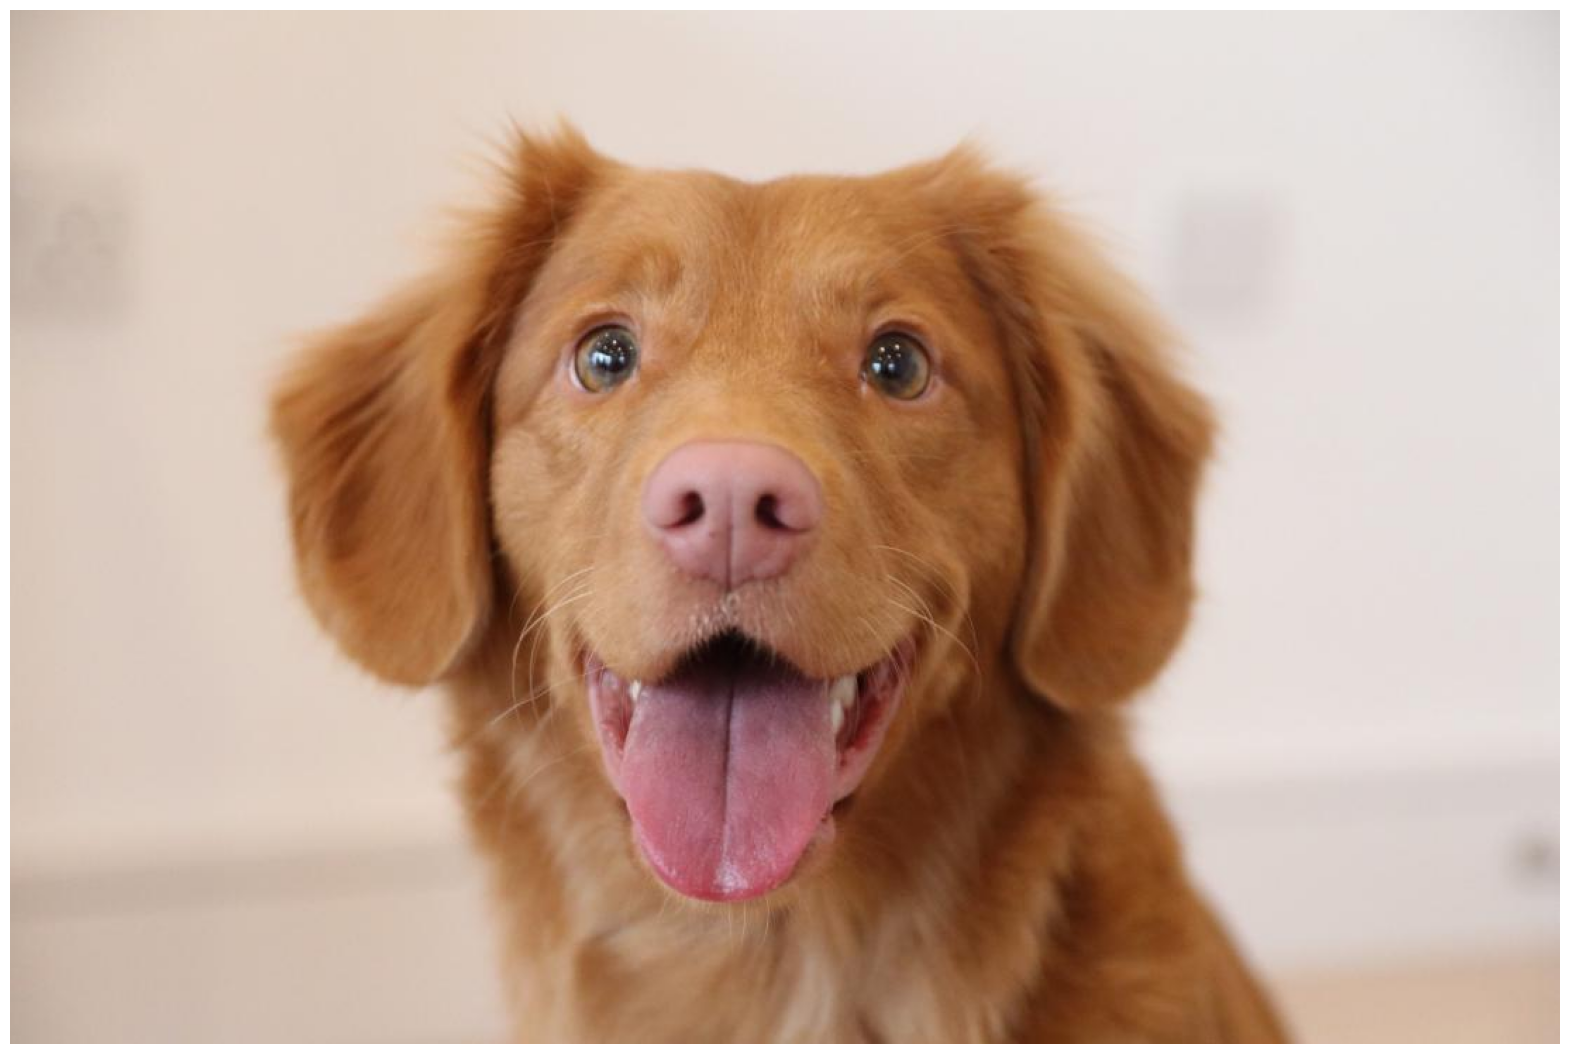

In [38]:
plot(im)

In [39]:
# Convert the numpy array 'im' to a PIL image format for further processing.
image = Image.fromarray(im) #convert to pil

In [40]:
# Apply preprocessing to the PIL image 'image' and convert it to a tensor.
img_tensor = preprocess(image)

In [41]:
# Add an extra dimension at the beginning of 'img_tensor' to create a batch dimension.
img_tensor = img_tensor.unsqueeze_(0)


In [42]:
# Retrieve and display the shape of 'img_tensor', which should now have a batch dimension.
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [43]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-43-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [44]:
out = net(img_variable)

In [45]:
label_index = out.cpu().data.numpy().argmax()

In [46]:
label_index

207

In [47]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [48]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [49]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [50]:
print(labels[label_index])

golden retriever


In [51]:
for i in range(10):
    print(labels[top_list[i]])

golden retriever
Brittany spaniel
Irish setter, red setter
Sussex spaniel
cocker spaniel, English cocker spaniel, cocker
tennis ball
vizsla, Hungarian pointer
Border collie
Tibetan mastiff
clumber, clumber spaniel


In [52]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [53]:
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [54]:
out = net.features[0](img_variable).cpu().detach().numpy()

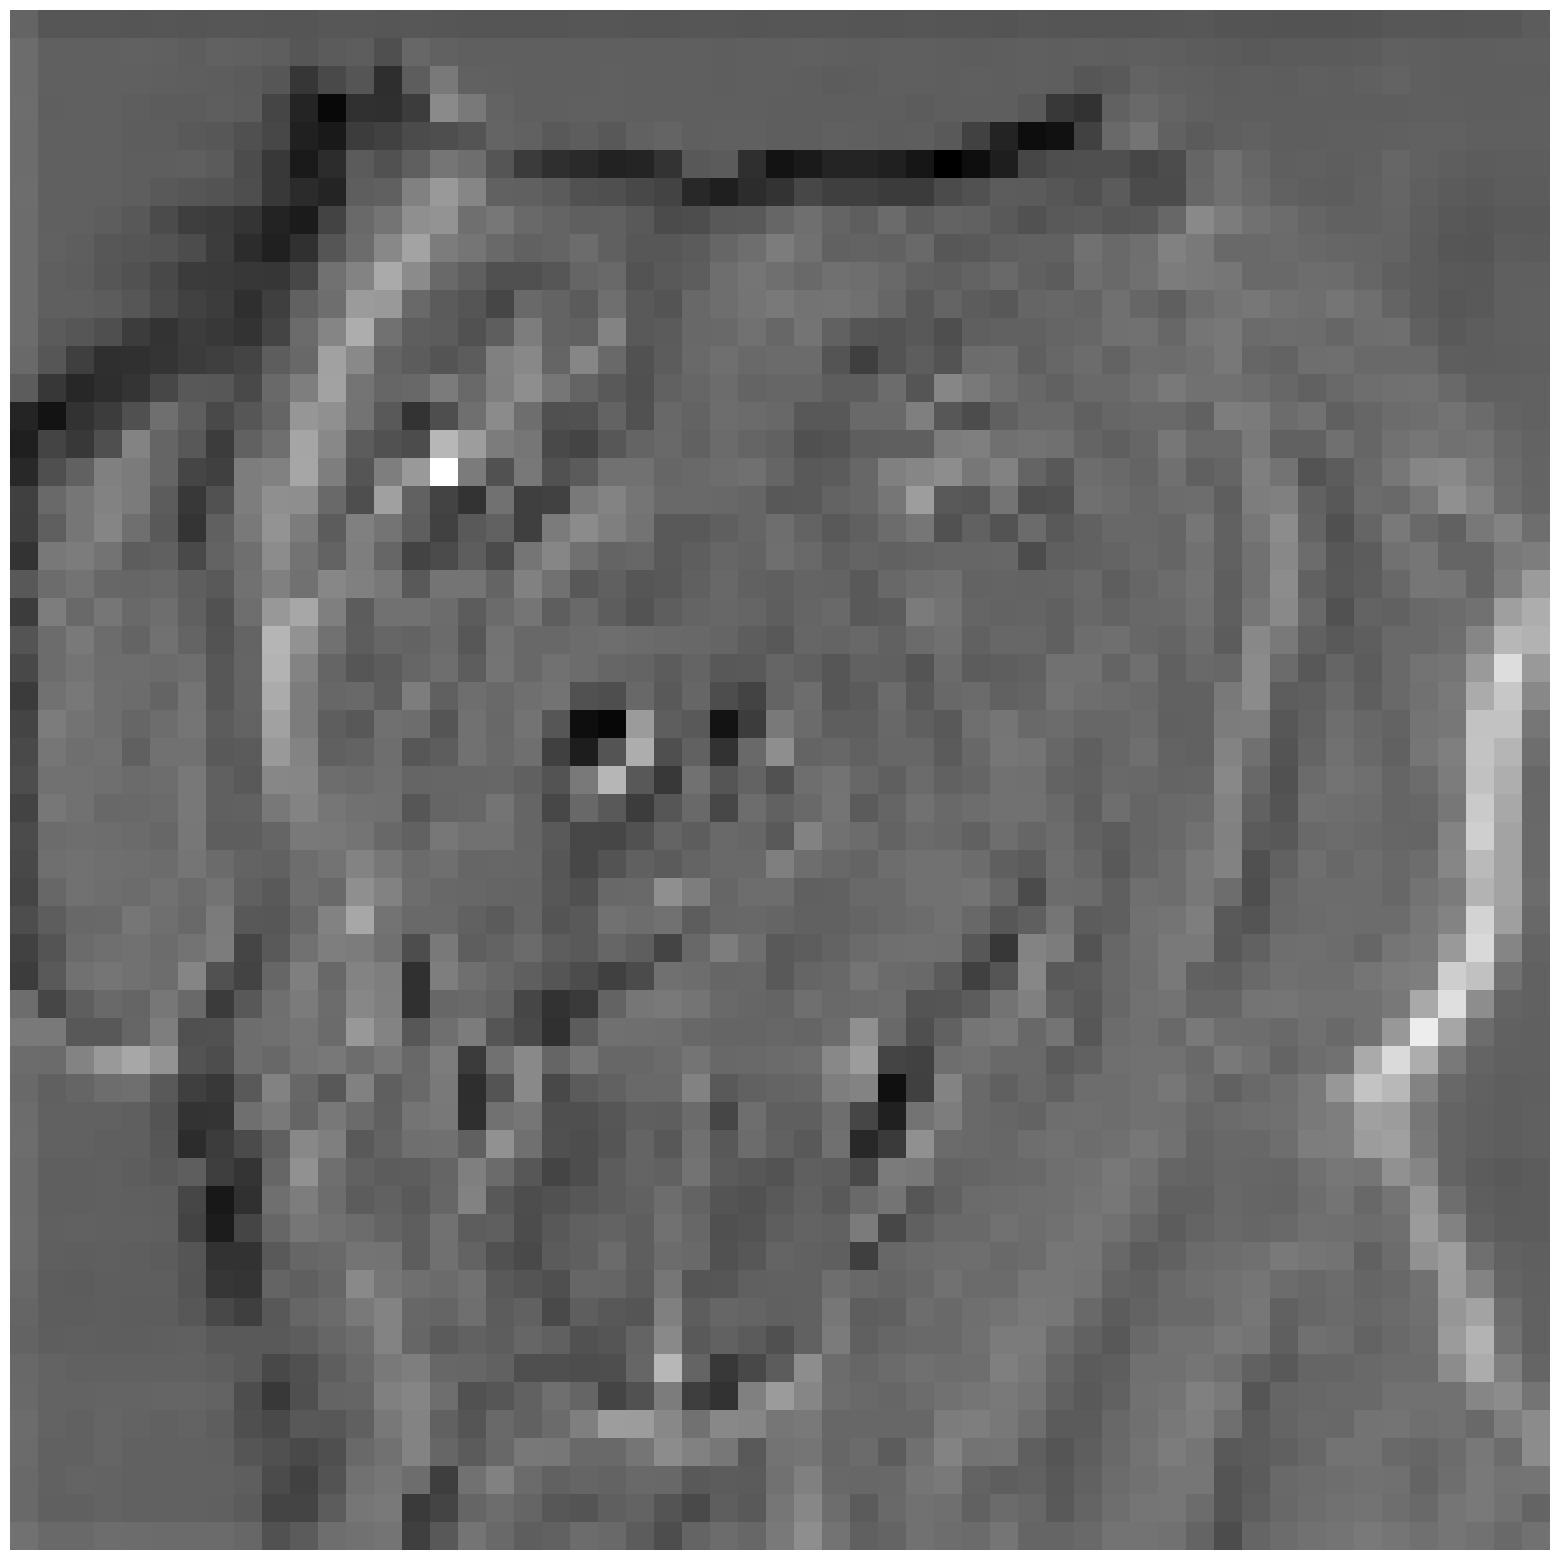

In [55]:
plot(out[0,0,:,:])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

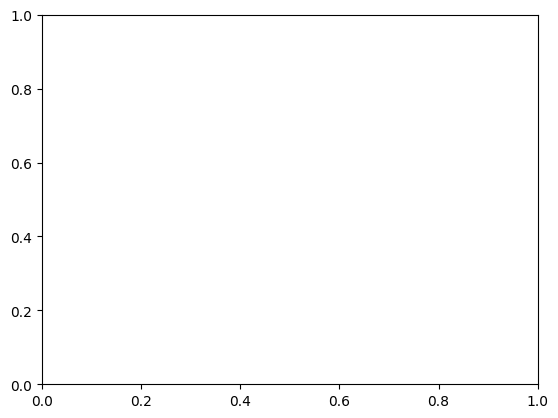

In [56]:
# Plot the features extracted by the sixth layer of the 'classifier' part of the network.
# This is done after applying the average pooling on the features extracted by the thirteenth layer of the 'features' part of the network on the 'img_variable'.
# The features are flattened into a 1D array and then moved from GPU to CPU for plotting.
plt.plot(np.arange(4096), net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu())

# Get the current figure for further modification.
fig = plt.gcf()

# Set the size of the figure to 10 by 10 inches.
fig.set_size_inches(10, 10)


In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

In [ ]:
plot(im)

In [ ]:
def load_im(im):
    # Convert a numpy array (im) into a PIL image object
    image = Image.fromarray(im) #convert to pil

    # Apply predefined preprocessing steps to the PIL image to get it ready for the model
    img_tensor = preprocess(image)

    # Add an additional dimension to the tensor to represent batch size
    img_tensor = img_tensor.unsqueeze_(0)

    # Convert the tensor to a PyTorch tensor and transfer it to the GPU
    img_variable = torch.tensor(img_tensor).cuda(0)

    # Return the preprocessed image tensor ready for model input
    return img_variable


In [ ]:
out = net(load_im(im))

In [ ]:
def inference(im):
    # Pass the image through the network to obtain the output predictions
    out = net(load_im(im))

    # Get the index of the highest prediction score after moving the output back to CPU and converting it to a numpy array
    label_index = out.cpu().data.numpy().argmax()

    # Obtain a list of indices corresponding to the predictions sorted from highest to lowest score
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

    # Print the label of the highest prediction
    print(labels[label_index])

    # Print a separator
    print("___")

    # Print the top 10 labels according to the highest scores
    for i in range(10):
        print(labels[top_list[i]])


In [ ]:
inference(im)

# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/1VkpMTucKA__aAfkASbzquIl79U09qbc4LpMFGSKatyw/edit?pli=1#slide=id.g19b8867b70f_0_176"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [ ]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1VkpMTucKA__aAfkASbzquIl79U09qbc4LpMFGSKatyw/edit?pli=1#slide=id.g19b8867b70f_0_176"

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

In [ ]:
model(images)

In [ ]:
y = model(images)

In [ ]:
y.shape

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

In [ ]:
np.argmax(X[0])

In [ ]:
labels[948]

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

In [ ]:
labels

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()
